In [1]:
!pip install yfinance
import yfinance as yf

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Démontrons que le changement de prix sur 15minutes suit une loi de Pareto.

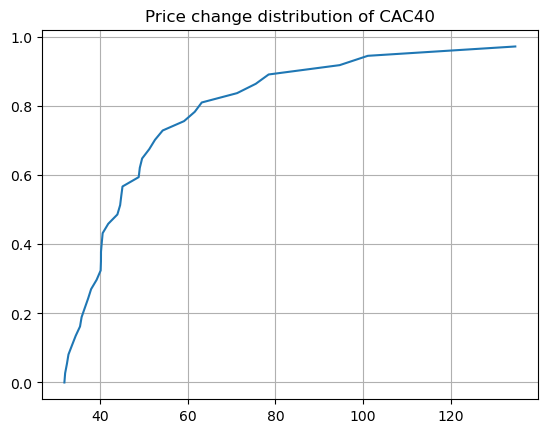

In [3]:
def plot_distribution(tick, label="", normalise=False):
    # CREATE TICKER INSTANCE
    ticker = yf.Ticker(tick)

    # GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
    end_date = datetime.now().strftime('%Y-%m-%d')
    start_date = (datetime.now() - timedelta(50)).strftime('%Y-%m-%d')

    # GET DATAFRAME
    df = ticker.history(start=start_date,end=end_date, interval="15m")
    df['Price Change'] = abs(df['Close'].diff())

    # PLOTTING
    df['Price Change']
    x = np.array(sorted(df['Price Change'][df['Price Change']>df['Price Change'].std()*3].dropna()))
    # On ne garde que la queue de 
    if normalise:
        x = 100*x/max(x)
    n = len(x)
    y = [i/n for i in range(n)]
    plt.plot(x, y, label=label)

df = plot_distribution("^FCHI")
plt.title("Price change distribution of CAC40")
plt.grid()

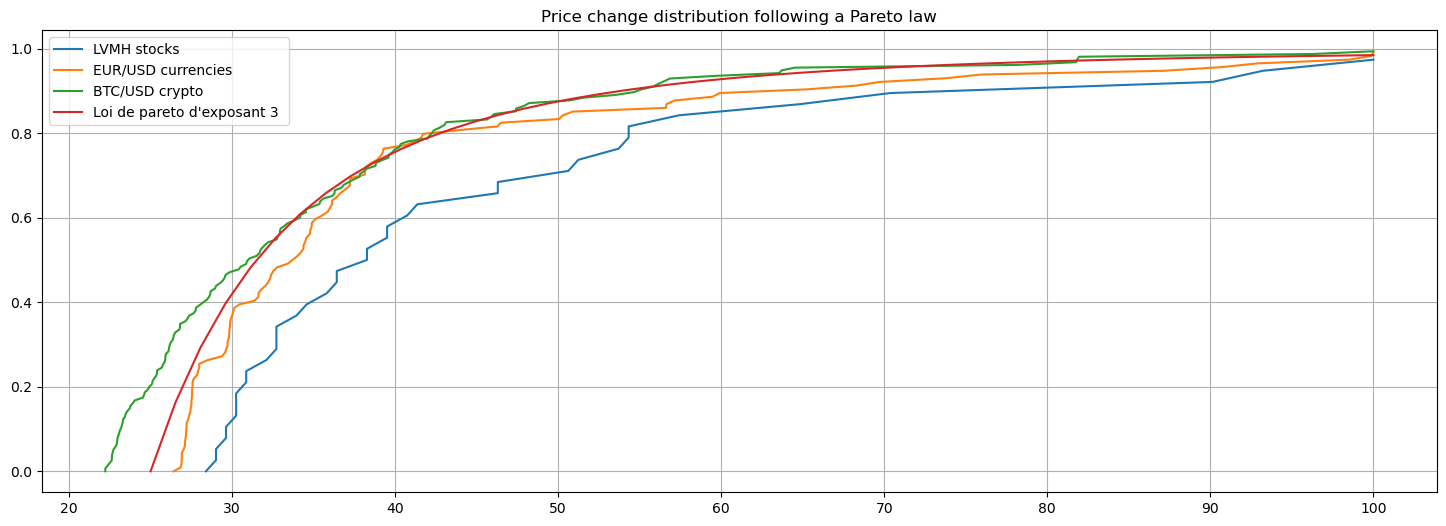

In [4]:
plt.figure(figsize=(18, 6))

plot_distribution("MC.PA", label="LVMH stocks", normalise=True)
plot_distribution("EURUSD=X", label="EUR/USD currencies", normalise=True)
plot_distribution("BTC-USD", label="BTC/USD crypto", normalise=True)

xm = 25
x3 = np.linspace(xm, 100)
y3 = [1-(xm/x_)**3 for x_ in x3]
plt.plot(x3, y3, label="Loi de pareto d'exposant 3 ")

plt.title("Price change distribution following a Pareto law")
plt.grid()
plt.legend()
plt.savefig("Pareto_law.jpg")